# Kidney_2

In [1]:
import os
import pandas as pd
from PIL import Image
import torch
from torchvision.transforms import ToTensor
from tqdm import tqdm
import matplotlib.pyplot as plt
import random
import numpy as np

In [2]:
input_dir = "/kaggle/input/blood-vessel-segmentation/"

### ¿What are the files like?

In [10]:
k2_path = f"{input_dir}train/kidney_2/"
k2_imgs = pd.Series(os.listdir(f"{k2_path}images")).sort_values()
k2_labels = pd.Series(os.listdir(f"{k2_path}labels")).sort_values()

display(k2_imgs)
display(k2_labels)

1362    0000.tif
877     0001.tif
1163    0002.tif
2077    0003.tif
1884    0004.tif
          ...   
2009    2212.tif
917     2213.tif
708     2214.tif
161     2215.tif
436     2216.tif
Length: 2217, dtype: object

1362    0000.tif
877     0001.tif
1163    0002.tif
2077    0003.tif
1884    0004.tif
          ...   
2009    2212.tif
917     2213.tif
708     2214.tif
161     2215.tif
436     2216.tif
Length: 2217, dtype: object

#### ¿How many of them are there?

Fewer that in the dense dataset.

In [11]:
k2_imgs.nunique(), k2_labels.nunique() 

(2217, 2217)

### ¿All the images and masks have the same shapes?

In [12]:
# check if all the images have the same shape
images_shapes = []
for idx in tqdm(range(len(k2_imgs))):
    image = Image.open(k2_path + "images/" + k2_imgs[idx])
    images_shapes.append((image.height, image.width))

images_shapes = set(images_shapes)
images_shapes

100%|██████████| 2217/2217 [00:33<00:00, 67.12it/s]


{(1041, 1511)}

In [13]:
# check if all the labels have the same shape
labels_shapes = []
for idx in tqdm(range(len(k2_labels))):
    image = Image.open(k2_path + "labels/" + k2_labels[idx])
    labels_shapes.append((image.height, image.width))

labels_shapes = set(labels_shapes)
labels_shapes

100%|██████████| 2217/2217 [00:28<00:00, 77.37it/s]


{(1041, 1511)}

### ¿What are the values of the masks?

In [7]:
mask_values = set()
for idx in tqdm(range(len(k2_labels))):
    label = Image.open(k2_path + "labels/" + k2_labels[idx])
    mask_values.update(ToTensor()(label).unique().tolist())
print(mask_values)

100%|██████████| 1397/1397 [01:56<00:00, 11.99it/s]

{0.0, 1.0}


### ¿What about the values of the images?

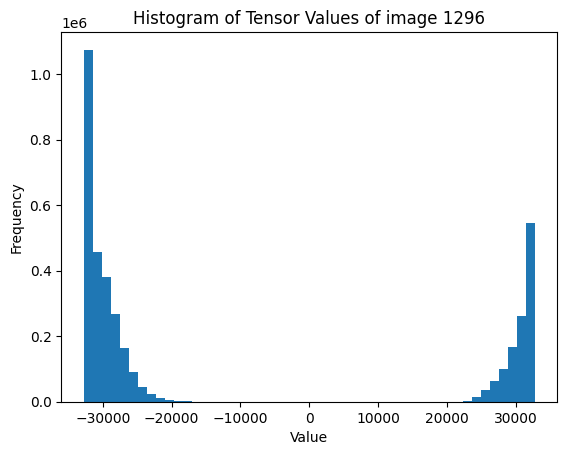

In [8]:
idx = random.randint(0, len(k2_imgs))

image = ToTensor()(Image.open(k2_path + "images/" + k2_imgs[idx]))

plt.hist(image.view(-1).numpy(), 50) 

plt.title(f'Histogram of Tensor Values of image {idx}')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.show()

### Let's look at some examples

Index 1609 of 2217


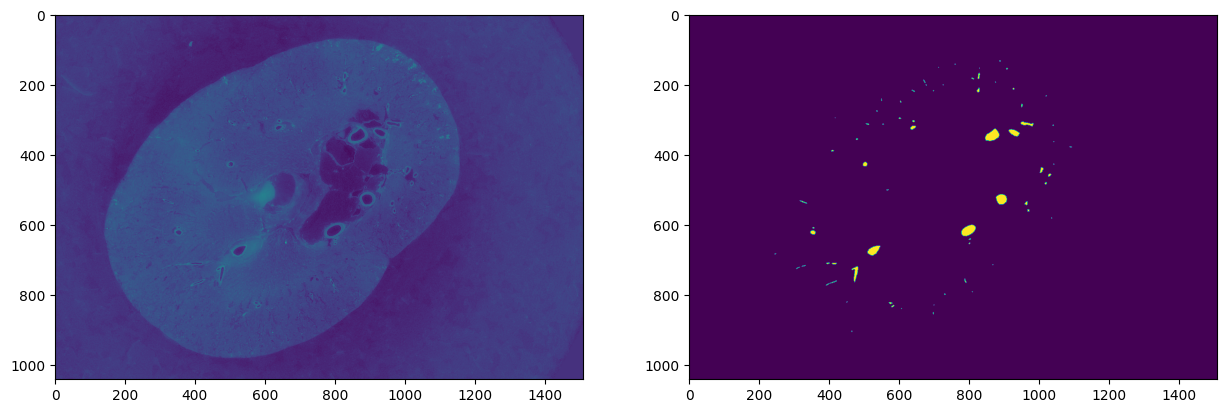

In [91]:
idx = random.randint(0, len(k2_imgs) - 1)

image = Image.open(k2_path + "images/" + k2_imgs[idx])
label = Image.open(k2_path + "labels/" + k2_labels[idx])

fig, ax = plt.subplots(1, 2, figsize=(15, 11))
ax[0].imshow(image)
ax[1].imshow(label)

print("Index", idx, "of", len(k2_imgs))
plt.show()

**Observations**

- The shape of this images is 1041X1511, while the ones from the kidney_1 are 1303X912, or in other words, this images are horizontal while the ones from kidney_1 are vertical. Fliping(Horizontal/Vertical does it matter?) is therefore a necessary augmentation.

### This dataset is "sparsely" segmented ¿What does that mean?

What do they mean by 65% segmented. I don't see any noticeable difference with respect to the kidney_1 dataset.

In [58]:
c = 0
for idx in tqdm(range(len(k2_labels))):
    label = Image.open(k2_path + "labels/" + k2_labels[idx])
    all_blank = (~ToTensor()(label).bool()).all()
    c = c + 1 if all_blank else c
print(f"Proportion of blank masks {c / len(k2_labels) * 100 :.2f}%")

100%|██████████| 2217/2217 [00:23<00:00, 92.44it/s] 

Proportion of blank masks 6.22%


**Observation**

- The proportion of blank masks, meaning all zeros is a bit higher (6%) in comparison with the kidney_1 dataset (2%)